# LDA Visualizations 

In [23]:
import pyLDAvis.gensim
import pickle
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import math
import warnings


In [26]:
warnings.filterwarnings("ignore", category=UserWarning)
modelname = 'model1.gensim'
corpusname = 'corpus_matrix.pkl' 
docsname = 'documents_clean.pkl'
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open(corpusname, 'rb'))
documents = pickle.load(open(docsname, 'rb'))
ldamodel = gensim.models.ldamodel.LdaModel.load(modelname)
N_TOPICS = 4

 # Model Perplexity and Coherence 


In [21]:
perplexity_score = ldamodel.log_perplexity(corpus)
coherence_model_lda = CoherenceModel(model=ldamodel, texts=documents, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()

print('\nPerplexity: ', perplexity_score)
print('\nCoherence: ', coherence_score)



Perplexity:  -7.039478714342579

Coherence:  0.33419816039375133


# Word Clouds

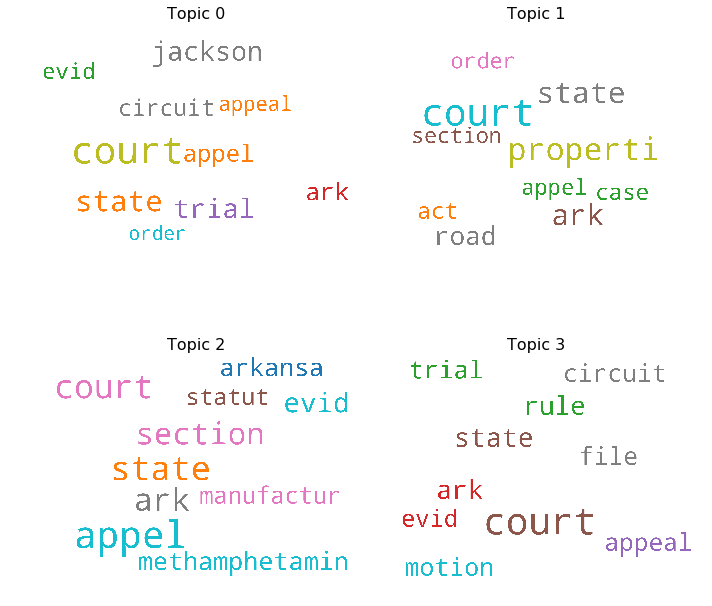

In [12]:
def topicCloud(model,N_TOPICS): 
    
    cloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=2500,
                      height=1800,
                      max_words=10,
                      colormap='tab10',
                      prefer_horizontal=1.0)
    
    topics = model.show_topics(formatted=False)
    h = math.ceil(N_TOPICS/2)
    fig, axes = plt.subplots(h, 2, figsize=(10,10), sharex=True, sharey=True)
    for i, ax in enumerate(axes.flatten()):
        fig.add_subplot(ax)
        topic_words = dict(topics[i][1])
        cloud.generate_from_frequencies(topic_words, max_font_size=300)
        plt.gca().imshow(cloud)
        plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
        plt.gca().axis('off')
    
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.show()
    return
topicCloud(ldamodel,N_TOPICS)

# Interactive Visualizations

In [29]:
warnings.filterwarnings("ignore", category=FutureWarning)
pyLDAvis.enable_notebook()
lda_display = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)
